In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
xl_report = 'gbc_500_trees_02_rate_8_depth_5_leaf_sqrt_10k_tfidf results.xlsx'

In [10]:
df = pd.read_excel(xl_report)

In [11]:
df.columns

Index(['case', 'remove', 'percent', 'in_train_p', 'in_train_n', 'in_test_p',
       'in_test_n', 'in_total', 'xy_check', 'precision', 'recall', 'f1',
       'support', 'off_diag', 'delta precision', 'delta recall'],
      dtype='object')

In [13]:
df.head(8)['delta precision']

0   -0.011106
1   -0.025803
2   -0.051579
3   -0.140816
4   -0.013085
5   -0.025308
6   -0.093726
7   -0.139597
Name: delta precision, dtype: float64

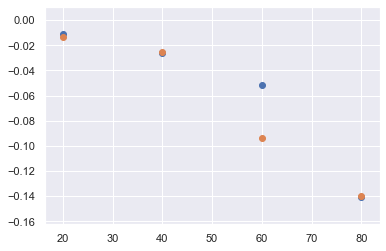

In [27]:
plt.scatter(df.percent.iloc[:4],df['delta precision'][:4])
plt.scatter(df.percent.iloc[4:8],df['delta precision'][4:8]);

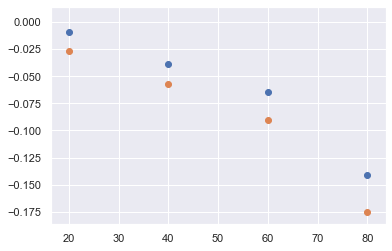

In [26]:
plt.scatter(df.percent.iloc[:4],df['delta recall'][:4])
plt.scatter(df.percent.iloc[4:8],df['delta recall'][4:8]);

In [34]:
res = df[['case', 'remove', 'percent', 'precision', 'recall']]
res

,case,remove,percent,precision,recall
0,A,obj,20,0.861882,0.884028
1,A,obj,40,0.859249,0.890278
2,A,obj,60,0.860650,0.892884
3,A,obj,80,0.866889,0.906876
4,A,subj,20,0.861074,0.890972
5,A,subj,40,0.866712,0.889583
6,A,subj,60,0.874817,0.895131
7,A,subj,80,0.871262,0.912968
8,B,obj,20,0.850777,0.875000
9,B,obj,40,0.833447,0.851389


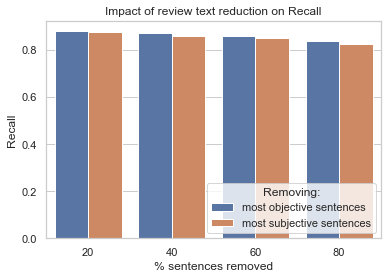

In [54]:
ax = sns.barplot(x="percent", y="recall", hue="remove", data=res, ci=None)
ax.set(xlabel='% sentences removed', ylabel='Recall')
ax.set_title('Impact of review text reduction on Recall')
# plt.legend.set_title('Removing most objective sentences')
legend = plt.legend(loc='lower right')
legend.set_title('Removing:')
new_labels = ['most objective sentences', 'most subjective sentences']
for t, l in zip(legend.texts, new_labels): t.set_text(l)